In [25]:
# from google.colab import drive
# drive.mount('/gdrive')

In [26]:
# cd /gdrive/MyDrive/project

In [27]:
# %pip install plotly
# %pip install yellowbrick
# %pip install chart_studio
# %pip install category_encoders

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
import warnings
import scipy.cluster.hierarchy as sch
from sklearn import preprocessing
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import KElbowVisualizer
warnings.filterwarnings('ignore')

# Females Encoding

In [29]:
females = pd.read_csv('females.csv',index_col = None)
females.drop('code', axis=1, inplace=True)
#females.drop('accept_address', axis=1, inplace=True)
females.drop('maintain_prayer', axis=1, inplace=True)
females.drop('nationality', axis=1, inplace=True)
females.drop('color', axis=1, inplace=True)
females.drop('accept_color', axis=1, inplace=True)
#females.drop('encoded_accept_color', axis=1, inplace=True)
females.rename(columns = {'age':'age1'}, inplace = True)
females.rename(columns = {'accept_age':'age2'}, inplace = True)
females.rename(columns = {'weight':'weight1'}, inplace = True)
females.rename(columns = {'accept_weight':'weight2'}, inplace = True)
females.rename(columns = {'height':'height1'}, inplace = True)
females.rename(columns = {'accept_height':'height2'}, inplace = True)
females.rename(columns = {'education':'education1'}, inplace = True)
females.rename(columns = {'accept_education':'education2'}, inplace = True)
females.rename(columns = {'accept_resid':'future_resid'}, inplace = True)

old_females = females.copy()

In [30]:
#Frequency encoding
#freq_color = (females.groupby('color').size()) / len(females)
#freq_education = (females.groupby('education').size()) / len(females)
freq_job = (females.groupby('job').size()) / len(females)
#freq_dress = (females.groupby('dress').size()) / len(females)
#freq_status = (females.groupby('status').size()) / len(females)
#freq_area_level = (females.groupby('area_level').size()) / len(females)
#freq_maintain_prayer = (females.groupby('maintain_prayer').size()) / len(females)
#freq_accept_education = (females.groupby('accept_education').size()) / len(females)
freq_future_resid = (females.groupby('future_resid').size()) / len(females)

In [31]:
#females['color'] = females['color'].apply(lambda x : freq_color[x])
#females['education'] = females['education'].apply(lambda x : freq_education[x])
females['job'] = females['job'].apply(lambda x : freq_job[x])
#females['dress'] = females['dress'].apply(lambda x : freq_dress[x])
#females['status'] = females['status'].apply(lambda x : freq_status[x])
#females['area_level'] = females['area_level'].apply(lambda x : freq_area_level[x])
#females['maintain_prayer'] = females['maintain_prayer'].apply(lambda x : freq_maintain_prayer[x])
#females['accept_education'] = females['accept_education'].apply(lambda x : freq_accept_education[x])
females['future_resid'] = females['future_resid'].apply(lambda x : freq_future_resid[x])

In [32]:
#Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
ord1 = OrdinalEncoder()
# fitting encoder
ord1.fit([females['area_level']])
# transforming the column after fitting
females["area_level"]= ord1.fit_transform(females[["area_level"]])

In [33]:
females.head(5)

,age1,weight1,height1,education1,job,status,area_level,dress,age2,weight2,height2,education2,accept_status,engage_period,future_resid
0,35,90,150,جامعي,0.015306,انسه,2.0,طرحة,40,95,160,جامعي,"['ارمل بدون اولاد', 'مطلق']",3,0.367347
1,35,50,157,متوسط,0.545918,انسه,2.0,طرحة,34,82,171,متوسط,['اعزب'],12,0.367347
2,44,80,170,فوق جامعي,0.086735,انسه,2.0,طرحة,47,85,180,فوق جامعي,"['ارمل بدون اولاد', 'اعزب', 'مطلق']",6,0.367347
3,25,68,160,جامعي,0.094388,انسه,3.0,طرحة,35,82,170,فوق جامعي,['اعزب'],3,0.367347
4,28,67,165,متوسط,0.094388,انسه,2.0,نقاب,32,82,175,فوق جامعي,['اعزب'],6,0.367347


In [34]:
#Target Encoding
import category_encoders as ce
females = ce.TargetEncoder().fit_transform(females['education1'],females['age1']).join(females.drop('education1',axis = 1))
females = ce.TargetEncoder().fit_transform(females['education2'],females['age2']).join(females.drop('education2',axis = 1))

In [35]:
#Dummy encoding
status1_1 = [0] * len(females)
status1_2 = [0] * len(females)
status1_3 = [0] * len(females)
females['status1_1'] = status1_1
females['status1_2'] = status1_2
females['status1_3'] = status1_3
for i in range(len(females)):
  if females.loc[females.index[i], 'status']  == "انسه":
    females.loc[females.index[i], 'status1_1'] = 1
  elif females.loc[females.index[i], 'status']  == "مطلقه":
    females.loc[females.index[i], 'status1_2'] = 1
  elif females.loc[females.index[i], 'status'] == "ارمله":
    females.loc[females.index[i], 'status1_3'] = 1
females.drop('status', axis=1, inplace=True)

dress_1 = [0] * len(females)
dress_2 = [0] * len(females)
dress_3 = [0] * len(females)
females['dress_1'] = dress_1
females['dress_2'] = dress_2
females['dress_3'] = dress_3
for i in range(len(females)):
  if females.loc[females.index[i], 'dress']  == "خمار":
    females.loc[females.index[i], 'dress_1'] = 1
  elif females.loc[females.index[i], 'dress']  == "نقاب":
    females.loc[females.index[i], 'dress_2'] = 1
  elif females.loc[females.index[i], 'dress'] == "طرحة":
    females.loc[females.index[i], 'dress_3'] = 1
females.drop('dress', axis=1, inplace=True)


#['متزوج','اعزب','ارمل له اولاد','مطلق', 'اعزب', 'ارمل بدون اولاد']
status2_1 = [0] * len(females)
status2_2 = [0] * len(females)
status2_3 = [0] * len(females)
status2_4 = [0] * len(females)
females['status2_1'] = status2_1
females['status2_2'] = status2_2
females['status2_3'] = status2_3
females['status2_4'] = status2_4
for i in range(len(females)):
  if "اعزب" in females.loc[females.index[i], 'accept_status']:
    females.loc[females.index[i], 'status2_1'] = 1
  elif "متزوج" in females.loc[females.index[i], 'accept_status']:
    females.loc[females.index[i], 'status2_2'] = 1
  elif "مطلق" in females.loc[females.index[i], 'accept_status']:
    females.loc[females.index[i], 'status2_3'] = 1
  elif "ارمل له اولاد" in females.loc[females.index[i], 'accept_status'] or 'ارمل بدون اولاد' in females.loc[females.index[i], 'accept_status']:
    females.loc[females.index[i], 'status2_4'] = 1
females.drop('accept_status', axis=1, inplace=True)


In [36]:
females.head(5)

,education2,education1,age1,weight1,height1,job,area_level,age2,weight2,height2,...,status1_1,status1_2,status1_3,dress_1,dress_2,dress_3,status2_1,status2_2,status2_3,status2_4
0,34.005464,29.102190,35,90,150,0.015306,2.0,40,95,160,...,1,0,0,0,0,1,0,0,1,0
1,34.857143,30.935484,35,50,157,0.545918,2.0,34,82,171,...,1,0,0,0,0,1,1,0,0,0
2,34.781915,32.459770,44,80,170,0.086735,2.0,47,85,180,...,1,0,0,0,0,1,1,0,0,0
3,34.781915,29.102190,25,68,160,0.094388,3.0,35,82,170,...,1,0,0,0,0,1,1,0,0,0
4,34.781915,30.935484,28,67,165,0.094388,2.0,32,82,175,...,1,0,0,0,1,0,1,0,0,0


In [37]:
#Data Z-Normalization
females_normalized = females.copy()
#females_normalized.drop(females_normalized.columns.difference(['age', 'weight', 'height', 'accept_height']), 1, inplace=True)
#for column in females_normalized.columns:
#    females_normalized[column] = (females_normalized[column] - females_normalized[column].mean()) / females_normalized[column].std()   

In [38]:
print(list(females_normalized.columns))

['education2', 'education1', 'age1', 'weight1', 'height1', 'job', 'area_level', 'age2', 'weight2', 'height2', 'engage_period', 'future_resid', 'status1_1', 'status1_2', 'status1_3', 'dress_1', 'dress_2', 'dress_3', 'status2_1', 'status2_2', 'status2_3', 'status2_4']


# Males Encoding

In [39]:
males = pd.read_csv('males.csv',index_col = None)

In [40]:
males.drop('code', axis=1, inplace=True)
males.drop('maintain_prayer_time', axis=1, inplace=True)
males.drop('maintain_prayer_masjid', axis=1, inplace=True)
males.drop('nationality', axis=1, inplace=True)
males.drop('color', axis=1, inplace=True)
males.drop('accept_color', axis=1, inplace=True)
males.rename(columns = {'accept_age':'age1'}, inplace = True)
males.rename(columns = {'age':'age2'}, inplace = True)
males.rename(columns = {'accept_weight':'weight1'}, inplace = True)
males.rename(columns = {'weight':'weight2'}, inplace = True)
males.rename(columns = {'accept_height':'height1'}, inplace = True)
males.rename(columns = {'height':'height2'}, inplace = True)
males.rename(columns = {'accept_education':'education1'}, inplace = True)
males.rename(columns = {'education':'education2'}, inplace = True)
old_males = males.copy()

In [41]:
#Frequency encoding
males_freq_job = (males.groupby('job').size()) / len(males)
males_freq_future_resid = (males.groupby('future_resid').size()) / len(males)

In [42]:
males['job'] = males['job'].apply(lambda x : males_freq_job[x])
males['future_resid'] = males['future_resid'].apply(lambda x : males_freq_future_resid[x])

In [43]:
#Ordinal Encoding
from sklearn.preprocessing import OrdinalEncoder
ord1 = OrdinalEncoder()
# fitting encoder
ord1.fit([males['area_level']])
# transforming the column after fitting
males["area_level"]= ord1.fit_transform(males[["area_level"]])

In [44]:
#Target Encoding
import category_encoders as ce
males = ce.TargetEncoder().fit_transform(males['education1'],males['age1']).join(males.drop('education1',axis = 1))
males = ce.TargetEncoder().fit_transform(males['education2'],males['age2']).join(males.drop('education2',axis = 1))

In [45]:
#Dummy encoding
status1_1 = [0] * len(males)
status1_2 = [0] * len(males)
status1_3 = [0] * len(males)
males['status1_1'] = status1_1
males['status1_2'] = status1_2
males['status1_3'] = status1_3
search_space = ['مطلقه لهااولاد','ارمله', 'بكر', 'مطلقه بدون اولاد']
for i in range(len(males)):
  if "بكر" in males.loc[males.index[i], 'accept_status']:
    males.loc[males.index[i], 'status1_1'] = 1
  elif "مطلقه لهااولاد" in males.loc[males.index[i], 'accept_status'] or "مطلقه بدون اولاد" in males.loc[males.index[i], 'accept_status']:
    males.loc[males.index[i], 'status1_2'] = 1
  elif "ارمله" in males.loc[males.index[i], 'accept_status']:
    males.loc[males.index[i], 'status1_3'] = 1
males.drop('accept_status', axis=1, inplace=True)

dress_1 = [0] * len(males)
dress_2 = [0] * len(males)
dress_3 = [0] * len(males)
males['dress_1'] = dress_1
males['dress_2'] = dress_2
males['dress_3'] = dress_3
for i in range(len(males)):
  if "خمار" in males.loc[males.index[i], 'accept_dress']:
    males.loc[males.index[i], 'dress_1'] = 1
  elif "نقاب" in males.loc[males.index[i], 'accept_dress']:
    males.loc[males.index[i], 'dress_2'] = 1
  elif "طرحة" in males.loc[males.index[i], 'accept_dress']:
    males.loc[males.index[i], 'dress_3'] = 1
males.drop('accept_dress', axis=1, inplace=True)


status2_1 = [0] * len(males)
status2_2 = [0] * len(males)
status2_3 = [0] * len(males)
status2_3 = [0] * len(males)
status2_4 = [0] * len(males)
males['status2_1'] = status2_1
males['status2_2'] = status2_2
males['status2_3'] = status2_3
males['status2_4'] = status2_4
for i in range(len(males)):
  if males.loc[males.index[i], 'status'] == "اعزب":
    males.loc[males.index[i], 'status2_1'] = 1
  elif males.loc[males.index[i], 'status'] ==  "متزوج":
    males.loc[males.index[i], 'status2_2'] = 1
  elif males.loc[males.index[i], 'status'] == "مطلق":
    males.loc[males.index[i], 'status2_3'] = 1
  elif males.loc[males.index[i], 'status'] == "ارمل":
    males.loc[males.index[i], 'status2_4'] = 1
males.drop('status', axis=1, inplace=True)

In [46]:
males.head(5)

,education2,education1,age2,weight2,height2,job,area_level,future_resid,age1,weight1,...,status1_1,status1_2,status1_3,dress_1,dress_2,dress_3,status2_1,status2_2,status2_3,status2_4
0,34.669872,28.381974,37,90,185,0.380769,2.0,0.500000,33,65,...,1,0,0,1,0,0,0,0,1,0
1,36.972222,29.280488,30,70,160,0.023077,3.0,0.500000,24,60,...,1,0,0,1,0,0,0,0,0,1
2,34.669872,28.381974,30,95,170,0.048077,2.0,0.276923,22,130,...,1,0,0,1,0,0,1,0,0,0
3,36.972222,29.280488,27,65,177,0.380769,2.0,0.500000,30,70,...,0,0,1,0,1,0,1,0,0,0
4,34.990000,28.381974,42,70,172,0.115385,2.0,0.500000,32,75,...,0,0,1,0,1,0,1,0,0,0


In [47]:
#Data Z-Normalization
males_normalized = males.copy()
#for column in males_normalized.columns:
#    males_normalized[column] = males_normalized[column]  / males_normalized[column].abs().max()  

# Ford Fulkerson Algorithm

In [48]:
class Mazoun:
	def __init__(self,graph):
		self.graph = graph
		self.males = len(graph)
		self.females = len(graph[0])

	def bpm(self,u,othM,seen):
		for v in range(self.females):
			if self.graph[u][v] and seen[v] == False:
				seen[v] = True
				if othM[v] == -1 or self.bpm(othM[v],othM,seen):
					othM[v] = u
					return True
		return False

	def maxBPM(self):
		othM = [-1] * self.females
		result = 0
		for i in range(self.males):
			seen = [False] * self.females
			if self.bpm(i,othM,seen):
				result += 1
		return result

# Some preprocessing before clustering

In [49]:
df = pd.concat([males_normalized, females_normalized], ignore_index=True)

In [50]:
df_new = df.copy()

# Implementation of Clustering Techniques

## KMeans

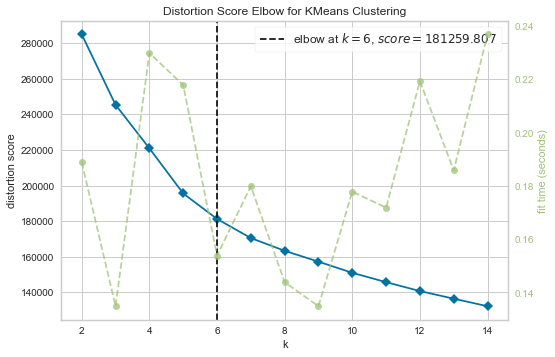

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,15))
visualizer.fit(df_new)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

In [52]:
import plotly as plt
import plotly.graph_objects as go
from sklearn.cluster import KMeans

# calling the agglomerative algorithm
model = KMeans(n_clusters=6, random_state=0)

# training the model on dataset
y_model = model.fit_predict(df_new)

# creating pandas dataframe
df_new['cluster'] = pd.DataFrame(y_model)

# creating scattered graph
trace1 = go.Scatter3d(
    
    # storing the variables in x, y, and z axis
    hovertext=df_new['cluster'],
    x= df_new['age1'],
    y= df_new['height1'],
    z= df_new['weight1'],
    mode='markers',
     marker=dict(
        color = df_new['cluster'],
        size= 3,
        line=dict(
            color= df_new['cluster'],
            width= 12
        ),
        opacity=0.9
     )
)

# ploting graph 
data = [trace1]
layout = go.Layout(
    title= 'Clusters using KMeans Clustering',
    scene = dict(
            xaxis = dict(title  = 'age1'),
            yaxis = dict(title  = 'height1'),
            zaxis = dict(title  = 'weight1')
        ),
    width=1024, height=512
)
fig = go.Figure(data=data, layout=layout)
plt.offline.iplot(fig)

In [53]:
df_newM = df_new.iloc[0:520,:]
df_newF = df_new.iloc[520:,:]

In [54]:
KM_adjMatrix = np.zeros((len(df_newM), len(df_newF)))
for i in range(len(df_newM)):
  for j in range(len(df_newF)):
    if df_newF.loc[df_newF.index[j], 'cluster'] == df_newM.loc[df_newM.index[i], 'cluster']:
      KM_adjMatrix[i,j] = 1  

## Agglomerative Clustering

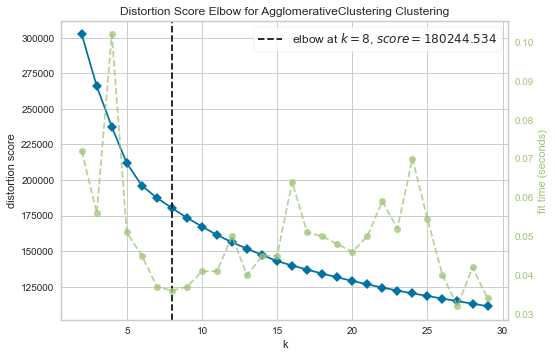

<AxesSubplot:title={'center':'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [55]:
from sklearn.cluster import AffinityPropagation
model = AgglomerativeClustering()
visualizer = KElbowVisualizer(model, k=(2,30))
visualizer.fit(df_new)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

In [56]:
import plotly as plt
import plotly.graph_objects as go
from sklearn.cluster import KMeans

# calling the agglomerative algorithm
model = AgglomerativeClustering(n_clusters = 8, affinity = 'euclidean', linkage ='average')

# training the model on dataset
y_model = model.fit_predict(df_new)

# creating pandas dataframe
df_new['cluster'] = pd.DataFrame(y_model)

# creating scattered graph
trace1 = go.Scatter3d(
    
    # storing the variables in x, y, and z axis
    hovertext=df_new['cluster'],
    x= df_new['age1'],
    y= df_new['height1'],
    z= df_new['weight1'],
    mode='markers',
     marker=dict(
        color = df_new['cluster'],
        size= 3,
        line=dict(
            color= df_new['cluster'],
            width= 12
        ),
        opacity=0.9
     )
)

# ploting graph 
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Agglomerative Clustering',
    scene = dict(
            xaxis = dict(title  = 'age1'),
            yaxis = dict(title  = 'height1'),
            zaxis = dict(title  = 'weight1')
        ),
    width=1024, height=512
)
fig = go.Figure(data=data, layout=layout)
plt.offline.iplot(fig)

In [57]:
df_newM = df_new.iloc[0:520,:]
df_newF = df_new.iloc[520:,:]

In [58]:
AC_adjMatrix = np.zeros((len(df_newM), len(df_newF)))
for i in range(len(df_newM)):
  for j in range(len(df_newF)):
    if df_newF.loc[df_newF.index[j], 'cluster'] == df_newM.loc[df_newM.index[i], 'cluster']:
      AC_adjMatrix[i,j] = 1 

## BIRCH

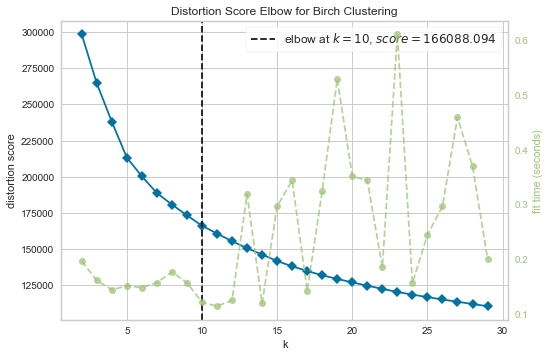

<AxesSubplot:title={'center':'Distortion Score Elbow for Birch Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
from sklearn.cluster import Birch
model = Birch(threshold=0.01)
visualizer = KElbowVisualizer(model, k=(2,30))
visualizer.fit(df_new)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

In [60]:
import plotly as plt
import plotly.graph_objects as go
from sklearn.cluster import KMeans

# calling the agglomerative algorithm
model = Birch(threshold=0.01, n_clusters=10)

# training the model on dataset
y_model = model.fit_predict(df_new)

# creating pandas dataframe
df_new['cluster'] = pd.DataFrame(y_model)

# creating scattered graph
trace1 = go.Scatter3d(
    
    # storing the variables in x, y, and z axis
    hovertext=df_new['cluster'],
    x= df_new['age1'],
    y= df_new['height1'],
    z= df_new['weight1'],
    mode='markers',
     marker=dict(
        color = df_new['cluster'],
        size= 3,
        line=dict(
            color= df_new['cluster'],
            width= 12
        ),
        opacity=0.9
     )
)

# ploting graph 
data = [trace1]
layout = go.Layout(
    title= 'Clusters using BIRCH',
    scene = dict(
            xaxis = dict(title  = 'age1'),
            yaxis = dict(title  = 'height1'),
            zaxis = dict(title  = 'weight1')
        ),
    width=1024, height=512
)
fig = go.Figure(data=data, layout=layout)
plt.offline.iplot(fig)

In [61]:
df_newM = df_new.iloc[0:520,:]
df_newF = df_new.iloc[520:,:]

In [62]:
BIRCH_adjMatrix = np.zeros((len(df_newM), len(df_newF)))
for i in range(len(df_newM)):
  for j in range(len(df_newF)):
    if df_newF.loc[df_newF.index[j], 'cluster'] == df_newM.loc[df_newM.index[i], 'cluster']:
      BIRCH_adjMatrix[i,j] = 1 

## Mean Shift

In [63]:
import plotly as plt
import plotly.graph_objects as go
from sklearn.cluster import MeanShift

# calling the agglomerative algorithm
model = MeanShift()

# training the model on dataset
y_model = model.fit_predict(df_new)

# creating pandas dataframe
df_new['cluster'] = pd.DataFrame(y_model)

# creating scattered graph
trace1 = go.Scatter3d(
    
    # storing the variables in x, y, and z axis
    hovertext=df_new['cluster'],
    x= df_new['age1'],
    y= df_new['height1'],
    z= df_new['weight1'],
    mode='markers',
     marker=dict(
        color = df_new['cluster'],
        size= 3,
        line=dict(
            color= df_new['cluster'],
            width= 12
        ),
        opacity=0.9
     )
)

# ploting graph 
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Mean Shift',
    scene = dict(
            xaxis = dict(title  = 'age1'),
            yaxis = dict(title  = 'height1'),
            zaxis = dict(title  = 'weight1')
        ),
    width=1024, height=512
)
fig = go.Figure(data=data, layout=layout)
plt.offline.iplot(fig)

In [64]:
df_newM = df_new.iloc[0:520,:]
df_newF = df_new.iloc[520:,:]

In [65]:
MS_adjMatrix = np.zeros((len(df_newM), len(df_newF)))
for i in range(len(df_newM)):
  for j in range(len(df_newF)):
    if df_newF.loc[df_newF.index[j], 'cluster'] == df_newM.loc[df_newM.index[i], 'cluster']:
      MS_adjMatrix[i,j] = 1 

## Mini-Batch KMeans

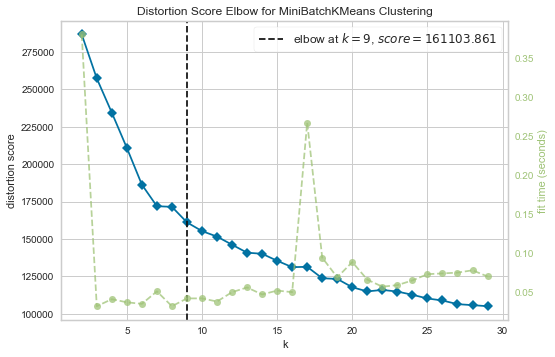

<AxesSubplot:title={'center':'Distortion Score Elbow for MiniBatchKMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [66]:
from sklearn.cluster import MiniBatchKMeans
model = MiniBatchKMeans()
visualizer = KElbowVisualizer(model, k=(2,30))
visualizer.fit(df_new)    # Fit the data to the visualizer
visualizer.show()    # Draw/show/show the data

In [67]:
import plotly as plt
import plotly.graph_objects as go
from sklearn.cluster import MeanShift

# calling the agglomerative algorithm
model =  MiniBatchKMeans(n_clusters=11)

# training the model on dataset
y_model = model.fit_predict(df_new)

# creating pandas dataframe
df_new['cluster'] = pd.DataFrame(y_model)

# creating scattered graph
trace1 = go.Scatter3d(
    
    # storing the variables in x, y, and z axis
    hovertext=df_new['cluster'],
    x= df_new['age1'],
    y= df_new['height1'],
    z= df_new['weight1'],
    mode='markers',
     marker=dict(
        color = df_new['cluster'],
        size= 3,
        line=dict(
            color= df_new['cluster'],
            width= 12
        ),
        opacity=0.9
     )
)

# ploting graph 
data = [trace1]
layout = go.Layout(
    title= 'Clusters using Mini_Batch KMeans',
    scene = dict(
            xaxis = dict(title  = 'age1'),
            yaxis = dict(title  = 'height1'),
            zaxis = dict(title  = 'weight1')
        ),
    width=1024, height=512
)
fig = go.Figure(data=data, layout=layout)
plt.offline.iplot(fig)

In [68]:
df_newM = df_new.iloc[0:520,:]
df_newF = df_new.iloc[520:,:]

In [69]:
MBKM_adjMatrix = np.zeros((len(df_newM), len(df_newF)))
for i in range(len(df_newM)):
  for j in range(len(df_newF)):
    if df_newF.loc[df_newF.index[j], 'cluster'] == df_newM.loc[df_newM.index[i], 'cluster']:
      MBKM_adjMatrix[i,j] = 1  

# Comparing between different clustering techniques in MBM

In [70]:
Algorithms = ["KMeans", "Mini-Batch Kmeans", "BIRCH", "Mean Shift", "Agglomerative Clustering"]
Accuracies = [Mazoun(KM_adjMatrix).maxBPM(), Mazoun(MBKM_adjMatrix).maxBPM(), 
              Mazoun(BIRCH_adjMatrix).maxBPM(), Mazoun(MS_adjMatrix).maxBPM(),
              Mazoun(AC_adjMatrix).maxBPM()]
list_of_tuples = list(zip(Algorithms, Accuracies))
Comparison = df = pd.DataFrame(list_of_tuples,
                  columns=['Algorithm', 'Cardinality'])

In [71]:
Comparison

,Algorithm,Cardinality
0,KMeans,252
1,Mini-Batch Kmeans,230
2,BIRCH,262
3,Mean Shift,387
4,Agglomerative Clustering,374
